In [12]:
#Package
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'

In [13]:
import warnings
warnings.filterwarnings(action='ignore')

In [14]:
train=pd.read_csv("train_processed.csv")
test=pd.read_excel("test_imputed.xlsx")
test.loc[(test.단지코드=='C2411')&(test.자격유형.isna()), '자격유형'] = 'A'
test.loc[(test.단지코드=='C2253')&(test.자격유형.isna()), '자격유형'] = 'C'

In [15]:
train.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        0
임대보증금       0
임대료         0
지하철역        0
버스정류장       0
단지내주차면수     0
등록차량수       0
단지명         0
도로명주소       0
dtype: int64

In [16]:
test.isna().sum()

단지코드         0
총세대수         0
임대건물구분       0
지역           0
공급유형         0
전용면적         0
전용면적별세대수     0
공가수          0
자격유형         0
지하철역        42
버스정류장        0
단지내주차면수      0
단지명          0
도로명주소        0
임대보증금        0
임대료          0
dtype: int64

In [19]:
set(train.자격유형)-set(test.자격유형)

{'B', 'F', 'O'}

In [67]:
pd.concat([train.공급유형.value_counts(), test.공급유형.value_counts()], axis=1)

,공급유형,공급유형
국민임대,1758,622.0
임대상가,562,177.0
행복주택,213,124.0
공공임대(10년),205,35.0
영구임대,152,45.0
공공임대(50년),31,13.0
공공임대(분납),12,6.0
장기전세,9,NaN
공공분양,7,NaN
공공임대(5년),3,NaN


In [68]:
pd.concat([train.자격유형.value_counts(), test.자격유형.value_counts()], axis=1)

,자격유형,자격유형
A,1801,573.0
D,569,180.0
H,155,92.0
J,114,84.0
C,95,35.0
I,49,7.0
E,37,10.0
L,33,12.0
K,33,16.0
N,30,10.0


# test에 B, F, O가 없다.

In [34]:
for i in train['공급유형'].unique():
    print(i,train[train['공급유형']==i]['자격유형'].unique())

국민임대 ['A' 'B' 'E' 'G' 'H']
공공임대(50년) ['A']
영구임대 ['C' 'E' 'F' 'I' 'A']
공공임대(10년) ['A']
공공임대(분납) ['A']
장기전세 ['A']
공공분양 ['D']
행복주택 ['J' 'K' 'L' 'M' 'N' 'O']
공공임대(5년) ['A']
임대상가 ['D']


In [45]:
for i in test['공급유형'].unique():
    print(i,test[test['공급유형']==i]['자격유형'].unique())

국민임대 ['H' 'A' 'E' 'G']
영구임대 ['C' 'D' 'I']
공공임대(50년) ['A']
공공임대(10년) ['A']
공공임대(분납) ['A']
행복주택 ['J' 'K' 'L' 'M' 'N']
임대상가 ['D']


- 오... 테스트에 공공임대 5년도 없네요. 

In [27]:
train_=train.drop(["지하철역", "버스정류장", "공가수", "전용면적별세대수"], axis=1)

In [30]:
train_=train_.drop_duplicates(keep='first')

In [48]:
국민임대=train_[train_.공급유형=="국민임대"]
영구임대=train_[train_.공급유형=="영구임대"]
행복주택=train_[train_.공급유형=="행복주택"]

- 국민임대 입주조건에 전용면적 관련해서 있는 걸 봐서 확인해봤다.

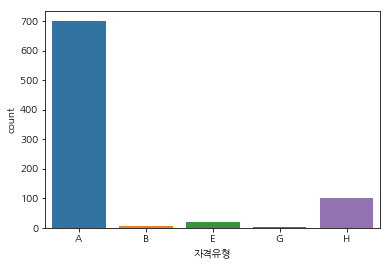

In [56]:
sns.countplot(국민임대[국민임대.전용면적<50].자격유형)

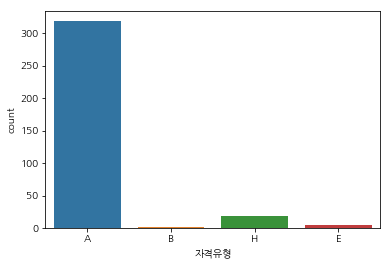

In [57]:
sns.countplot(국민임대[국민임대.전용면적>=50].자격유형)

- 전용면적 넘는 것으로 확정지어 보기는 힘든듯...ㅠㅠㅠ

- 유형별로 임대료랑 임대보증금을 보자아

# 행복주택

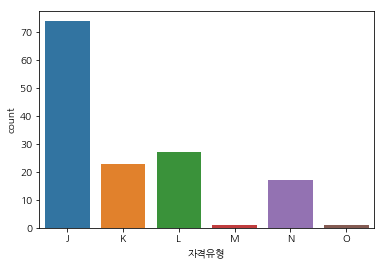

In [79]:
sns.countplot(행복주택.자격유형)

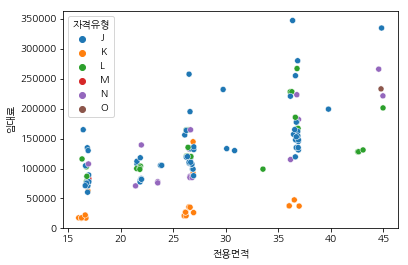

In [74]:
sns.scatterplot(x="전용면적", y="임대료", data=행복주택, hue="자격유형")

- J는 전반적으로 좀 퍼져 있음 
- K는 임대료가 낮고, 임대보증금이 높다. 
- 이런 식으로 임대료와 임대보증금에 따라 차이가 보인다. 

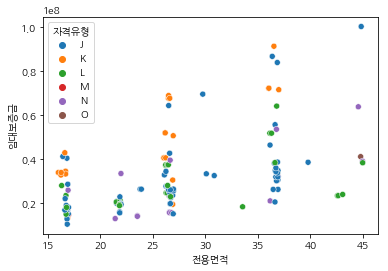

In [75]:
sns.scatterplot(x="전용면적", y="임대보증금", data=행복주택, hue="자격유형")

# 국민임대

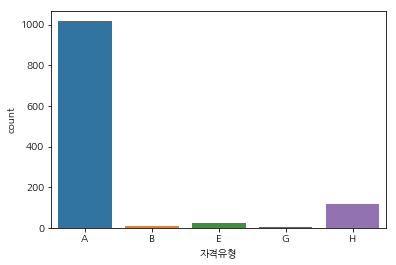

In [80]:
sns.countplot(국민임대.자격유형)

# A를 한번 빼고 볼까? 

In [85]:
국민임대_=국민임대[국민임대.자격유형!="A"]

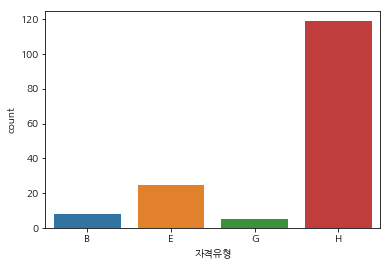

In [87]:
sns.countplot(국민임대_.자격유형)

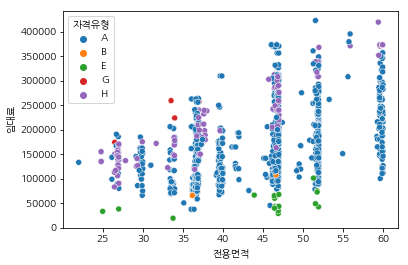

In [72]:
sns.scatterplot(x="전용면적", y="임대료", data=국민임대, hue="자격유형")

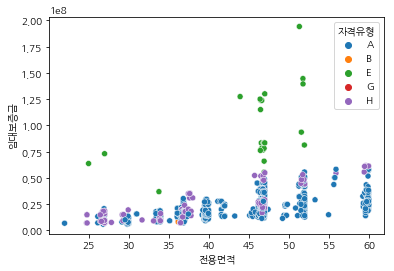

In [76]:
sns.scatterplot(x="전용면적", y="임대보증금", data=국민임대, hue="자격유형")

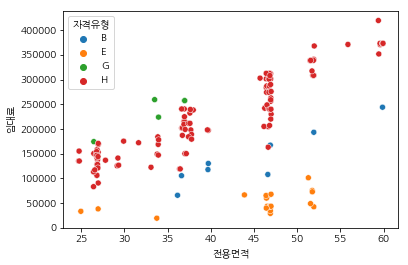

In [88]:
sns.scatterplot(x="전용면적", y="임대료", data=국민임대_, hue="자격유형")

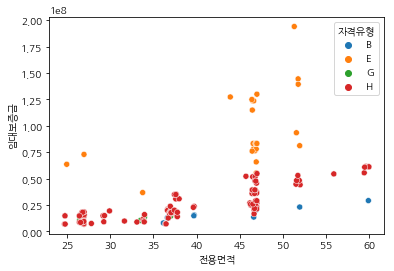

In [89]:
sns.scatterplot(x="전용면적", y="임대보증금", data=국민임대_, hue="자격유형")

- 마찬가지로 임대보증금과 임대료에 따른 차이가 보인다.

# 영구임대

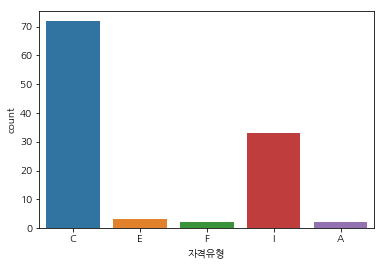

In [90]:
sns.countplot(영구임대.자격유형)

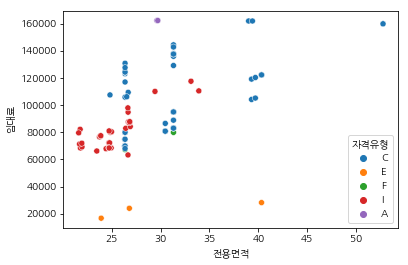

In [73]:
sns.scatterplot(x="전용면적", y="임대료", data=영구임대, hue="자격유형")

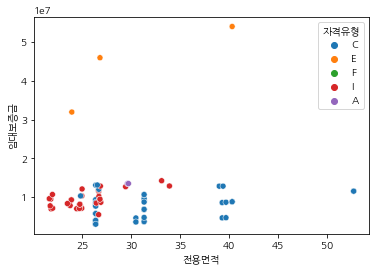

In [77]:
sns.scatterplot(x="전용면적", y="임대보증금", data=영구임대, hue="자격유형")

- 마찬가지로 임대료와 임대보증금 중 뭘 더 많이 내느냐의 차이. 
- 결국 같은 공급유형 안에서는 임대료, 임대보증금을 어떻게 냈냐에 따라 갈리고
- I같은 경우에는 특정 전용면적 이하에만 해당된다는 점이 특이점